### 準備資料

In [1]:
import numpy as np
# np.random.rand() 隨機生成(0,1)之間的數
x1 = np.random.rand(500)
x2 = np.random.rand(500) + 1
x_train = np.concatenate([x1, x2])
x_train = x_train.reshape((1000,1))

print(x_train.shape)
print(x_train[501])

(1000, 1)
[1.65032748]


In [8]:
y1=np.zeros(500, dtype=int)
y2=np.ones(500, dtype=int)
y_train=np.concatenate([y1, y2])
y_train=y_train.reshape((y_train.shape[0],1))

print(type(y_train))
print(y_train[0:5])
print(y_train.shape)

<class 'numpy.ndarray'>
[[0]
 [0]
 [0]
 [0]
 [0]]
(1000, 1)


In [9]:
import tensorflow as tf

y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=2)

print(type(y_train2))
print(y_train2[501:505])

<class 'numpy.ndarray'>
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


### 建立模型

In [21]:
"""
activation: https://keras.io/zh/activations/
"""
model = tf.keras.Sequential()
# input layer: 10個神經元, 激活函數使用relu, 輸入一維資料
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.relu,input_dim=1))

# output layer: 2個神經元(代表兩個結果), 激活函數使用softmax
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.sigmoid ))

"""
optimizaer: https://keras.io/zh/optimizers/
metrics: https://keras.io/zh/metrics/
loss: https://keras.io/zh/losses/
"""

#model.compile(optimizer='adam',
#       loss = tf.keras.losses.categorical_crossentropy,
#       metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy'])

model.summary()

"""
Param #: (input_dim+1)*units
"""

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 訓練模型

In [ ]:
history = model.fit(x_train, y_train2, epochs=20, batch_size=64)

### 評估訓練結果

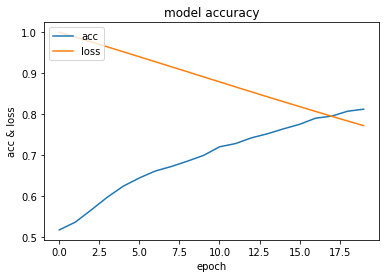

In [23]:
loss = np.array(history.history['loss'], dtype='float64')
loss = loss/max(loss)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(loss)
plt.title('model accuracy')
plt.ylabel('acc & loss')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

### 評估正確率

In [24]:
x_test = np.array([0.22,0.31,1.22,1.33])
y_test = np.array([0,0,1,1])
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=2)
score = model.evaluate(x_test, y_test2, batch_size=128)
print("score:",score)

1/1 [==============================] - 0s 116ms/step - loss: 0.4484 - accuracy: 1.0000
score: [0.44842296838760376, 1.0]


### 預測

In [25]:
x_test = np.array([0.29,0.61,1.02,1.88])

predict = model.predict(x_test)

print("第一個測試資料:", x_test[0])
print("class 0 機率:",predict[0, 0])
print("class 1 機率:",predict[0, 1])
print("Ans label :",np.argmax(predict[0])) # np.argmax() 返回最大值索引號

第一個測試資料: 0.29
class 0 機率: 0.52306706
class 1 機率: 0.4049724
Ans label : 0
